# CAT163 - Instrumentação

**Grupo**: Mateus Jorge Martins Gonçalves 18.2.1204<br>
       Matheus da Silva Nogueira 18.2.1237<br>
       Natália Luiza Braz 18.1.1379<br>

# "Determinação Experimental de Parâmetros de Sistemas de Medição"

A metodologia aqui discutida está fundamentada no capítulo 3 de (DOEBELIN, 1990). Segundo o
autor, apesar da importância do conhecimento acerca dos instrumentos de medição e suas
características, dificilmente tal abordagem é capaz de fornecer valores exatos o suficiente para
parâmetros como: sensibilidade estática, constante de tempo, quociente de amortecimento e
frequência natural não amortecida. Assim, procedimentos experimentais são necessários para
se definir tais parâmetros.
No caso particular de instrumentos de ordem zero, como não há dinâmica alguma, somente
é necessário se determinar a sensibilidade estática (K) do instrumento, sendo que tal
procedimento pode ser realizado por calibração estática. No caso de instrumentos de 1
a e 2
a
ordens, por exemplo, além de K, torna-se necessário determinar os parâmetros de interesse
listados anteriormente a fim de se obter um modelo matemático representativo do sistema.


# Installing necessary packages for running this notebook

In [1]:
!pip install control

# 1. Loading Python Librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import control.matlab as control

from scipy.stats import linregress

# 1.1. "Instrumentos de Primeira Ordem"

No caso de instrumentos de primeira ordem, K também pode ser definido pela calibração
estática do instrumento. Já com relação ao comportamento dinâmico, necessita-se determinar a
constante de tempo (τ) do sistema de medição. Para tanto, um dos métodos mais simples para
obtenção de τ é a aplicação de um degrau e a verificação de quanto tempo é necessário para que
o valor de saída do instrumento alcance 63,2% do valor final. Um outro método apresentado
por Doebelin também se vale da resposta ao degrau dada por um sistema de medição. Porém, os
dados resultantes são ‘replotados’ semi-logaritmicamente para se obter uma estimativa de τ. Para
tanto, considere que:

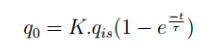

Em que,
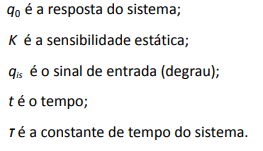

Daí, tem-se que:
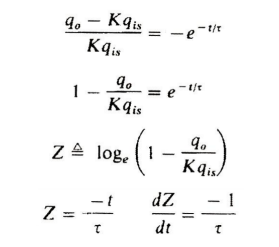

# 1.2. Loading data

In [3]:
data = pd.read_excel('dados1ordem.xlsx')
data.head()

,tempo,qo lento,qo rápido
0,0.00,0.000000,0.000000
1,0.05,0.095167,0.153549
2,0.10,0.181277,0.283521
3,0.15,0.259192,0.393536
4,0.20,0.329692,0.486658


# 1.3. Data visualization in time domain

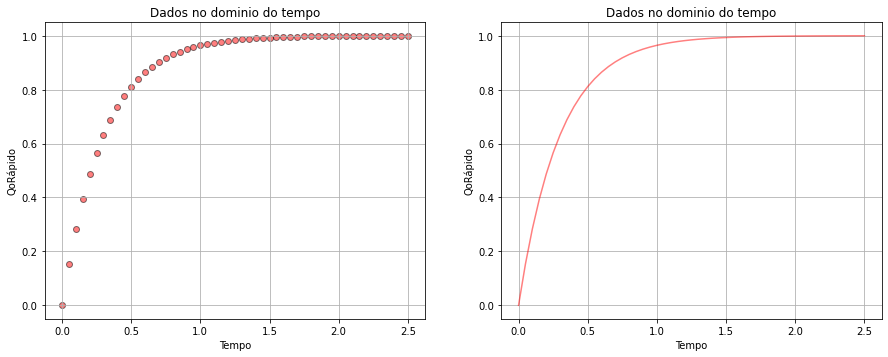

In [5]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(data['tempo'], data['qo rápido'], edgecolors='black', alpha=0.5,
            color='red')
plt.title('Dados no dominio do tempo')
plt.xlabel('Tempo')
plt.ylabel('QoRápido')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(data['tempo'], data['qo rápido'], alpha=0.5, color='red')
plt.title('Dados no dominio do tempo')
plt.xlabel('Tempo')
plt.ylabel('QoRápido')
plt.grid()

# 1.4. Applying Z transform in "qo rápido"

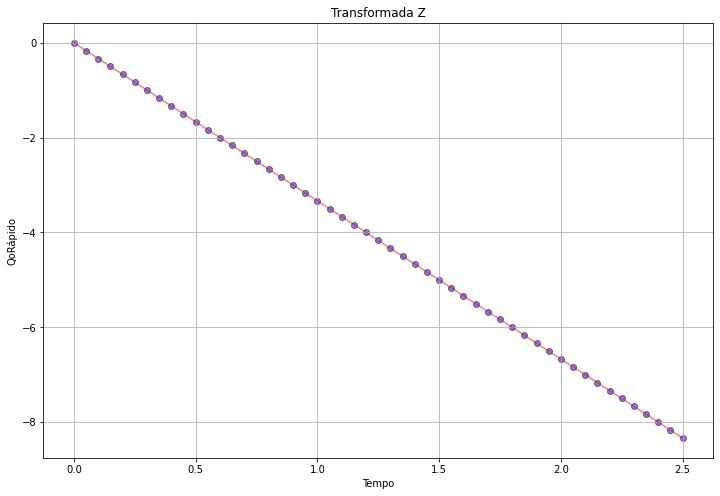

In [7]:
y_Ztransform = []
for i in data['qo rápido']:
    trans_z = math.log(1 - i)
    y_Ztransform.append(trans_z)

plt.figure(figsize=(12, 8))
plt.scatter(data['tempo'], y_Ztransform, edgecolors='black', alpha=0.5, color='blue')
plt.plot(data['tempo'], y_Ztransform, alpha=0.5, color='red')
plt.title('Transformada Z')
plt.xlabel('Tempo')
plt.ylabel('QoRápido')
plt.grid()
plt.show()

# 1.5. Finding Slope for "qo rápido" in Z domain

In [8]:
coef = linregress(data['tempo'], y_Ztransform)
print(coef)

print("\n Coef. Angular: ", coef[0])
coef_angular = coef[0]

LinregressResult(slope=-3.334068332739728, intercept=-5.684341886080802e-14, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

 Coef. Angular:  -3.334068332739728


# 1.5.1. Finding Tal

In [9]:
tal = -1 / coef_angular
print("Tal p/ QoRápido: ", tal)

Tal p/ QoRápido:  0.2999338646362604


# 1.5.2. Making the new transfer function

In [10]:
sys = control.tf([1], [tal, 1])
print(sys)


     1
------------
0.2999 s + 1



# 1.5.3. Plotting the Step Response

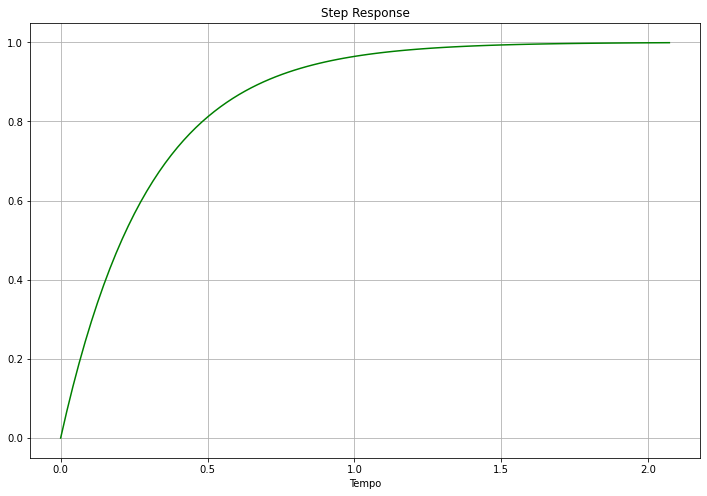

In [11]:
y, t = control.step(sys)

plt.figure(figsize=(12, 8))
plt.plot(t, y, color='green')
plt.title('Step Response')
plt.xlabel('Tempo')
plt.grid()
plt.show()

# 1.6. Data visualization in time domain

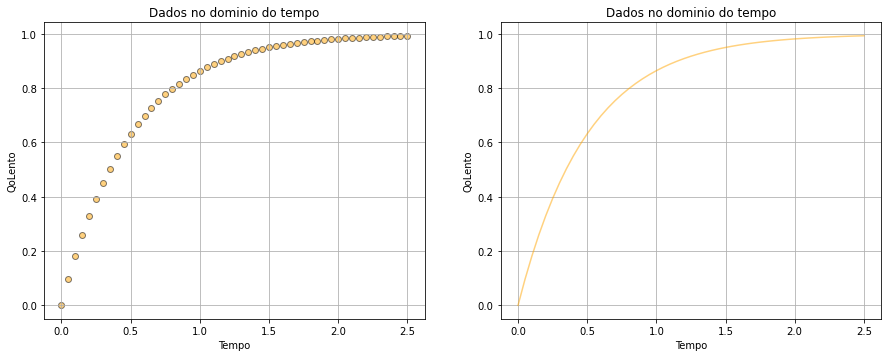

In [12]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(data['tempo'], data['qo lento'], edgecolors='black', alpha=0.5,
            color='orange')
plt.title('Dados no dominio do tempo')
plt.xlabel('Tempo')
plt.ylabel('QoLento')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(data['tempo'], data['qo lento'], alpha=0.5, color='orange')
plt.title('Dados no dominio do tempo')
plt.xlabel('Tempo')
plt.ylabel('QoLento')
plt.grid()

# 1.7. Applying Z transform in "qo lento"

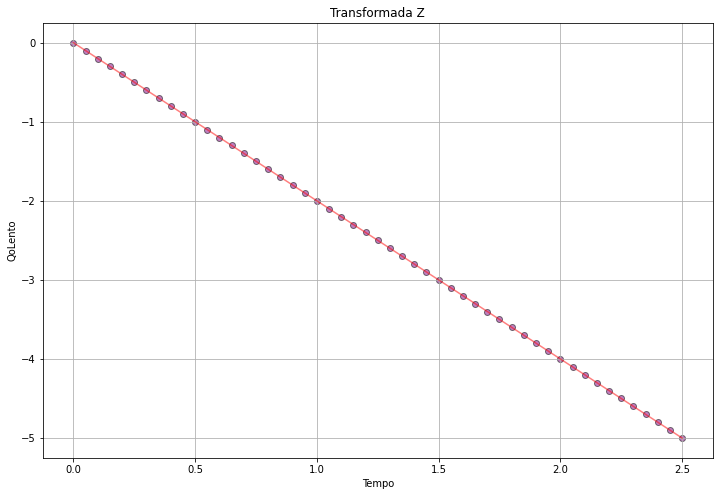

In [14]:
# Dados transformados pela transformada Z
y_Ztransform = []
for i in data['qo lento']:
    trans_z = math.log(1 - i)
    y_Ztransform.append(trans_z)

plt.figure(figsize=(12, 8))
plt.scatter(data['tempo'], y_Ztransform, edgecolors='black', alpha=0.5,
            color='purple')
plt.plot(data['tempo'], y_Ztransform, alpha=0.5, color='red')
plt.title('Transformada Z')
plt.xlabel('Tempo')
plt.ylabel('QoLento')
plt.grid()

# 1.8.1. Finding Slope for "qo rápido" in Z domain

In [15]:
coef = linregress(data['tempo'], y_Ztransform)
print(coef)

print("\n Coef. Angular: ", coef[0])
coef_angular = coef[0]

LinregressResult(slope=-2.000090286094823, intercept=1.3322676295501878e-15, rvalue=-0.9999999999999998, pvalue=0.0, stderr=6.02125016401066e-09, intercept_stderr=8.734272540898678e-09)

 Coef. Angular:  -2.000090286094823


# 1.8.2. Finding Tal

In [16]:
tal = -1 / coef_angular
print("Tal p/ QoLento: ", tal)

Tal p/ QoLento:  0.4999774294951956


# 1.8.3. Making the new transfer function

In [18]:
sys = control.tf([1], [tal, 1])
print(sys)


    1
---------
0.5 s + 1



# 1.8.4. Plotting the Step Response

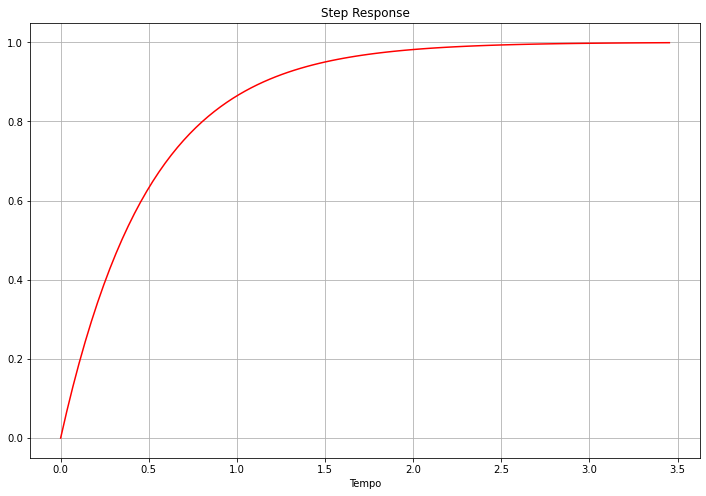

In [19]:
y, t = control.step(sys)

plt.figure(figsize=(12, 8))
plt.plot(t, y, color='red')
plt.title('Step Response')
plt.xlabel('Tempo')
plt.grid()
plt.show()

# 2. "Instrumentos de Segunda Ordem

Considere o método discutido nas págs.190-191 do livro do Doebelin (4ª Ed.). Valha-se das
equações 3.319 e 3.320 e da Fig.3.101a. Considere também os dados anexos contidos no arquivo
dados2ordem.xlsx. Escreva uma rotina que permita que os parâmetros Quociente de
amortecimento (ζ) e Frequência natural não amortecida (ωn
) sejam estimados.

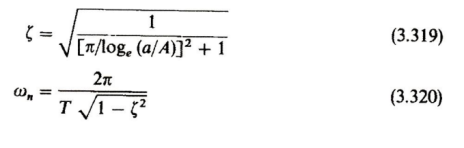

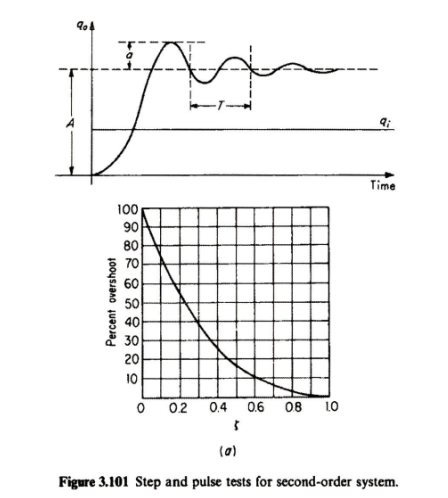

# 2.1. Reading data

In [20]:
data = pd.read_excel('dados2aordem.xlsx')
data.head()

,tempo,qo,Unnamed: 2,Unnamed: 3,Unnamed: 4,CIRCUITO RLC SÉRIE
0,0.00,0.000000,NaN,NaN,NaN,NaN
1,0.01,0.033833,NaN,NaN,NaN,NaN
2,0.02,0.128297,NaN,NaN,NaN,NaN
3,0.03,0.271173,NaN,NaN,NaN,NaN
4,0.04,0.448111,NaN,NaN,NaN,NaN


In [21]:
data = data.dropna(axis='columns')
data.head()

,tempo,qo
0,0.00,0.000000
1,0.01,0.033833
2,0.02,0.128297
3,0.03,0.271173
4,0.04,0.448111


# 2.2. Visualizing Step Response

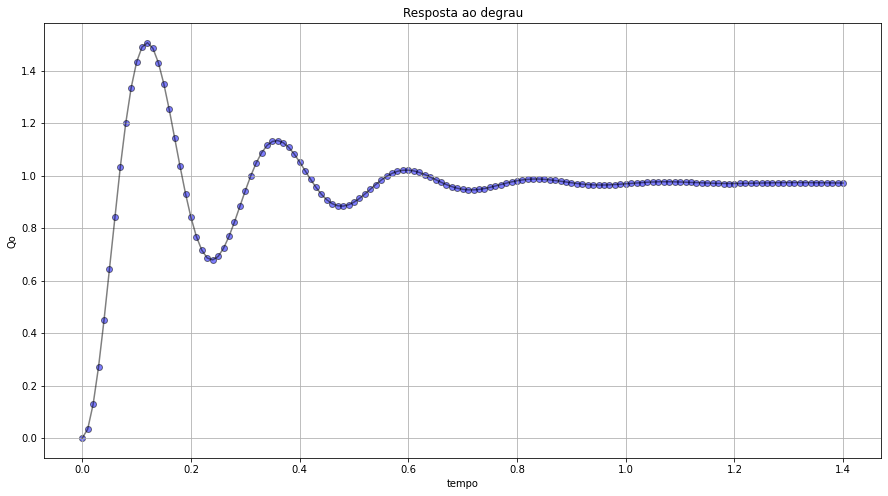

In [22]:
plt.figure(figsize=(15, 8))

plt.scatter(data['tempo'], data['qo'], edgecolors='black', alpha=0.5, color='blue')
plt.plot(data['tempo'], data['qo'], alpha=0.5, color='black')
plt.title('Resposta ao degrau')
plt.xlabel('tempo')
plt.ylabel('Qo')
plt.grid()
plt.show()

# 2.3. Finding the equations params using dataset

In [23]:
max_value = data['qo'].max()
A = 0.97
a = abs(A - max_value)

values = []
for value in data['tempo']:
    if value < A and value > 0.2:
        values.append(value)
        
df = pd.DataFrame(values, columns=['tempo'])

accomodation_value_max = df['tempo'].max()
print(accomodation_value_max)

accomodation_value_min = df['tempo'].min()
print(accomodation_value_min)

Ts = accomodation_value_max - accomodation_value_min
print('Tempo de acomodação: ', Ts)

# 2.4. Calculating Damping Factor

In [28]:
e = 2.71828

log = math.log(a/A)
aux = math.pi / log

q_amortecimento = math.sqrt(1 / ((pow(aux, 2)) + 1))

print("Quociente de amortecimento: ", q_amortecimento)

Quociente de amortecimento:  0.18523862371958566


# 2.4.1. Calculating Undamped Oscilation

In [29]:
# Calculo freq natural n amortecida
wn = (2 * math.pi) / (Ts * math.sqrt(1 - pow(q_amortecimento, 2)))
print("Freq. natural não amortecida", wn)

Freq. natural não amortecida 8.525119799654576


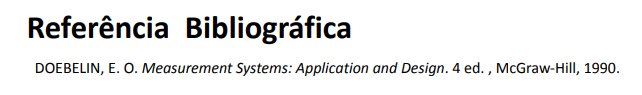